In [18]:

# function to impute_nan values with random observations
def impute_random_nan(Data,ColName):
    
    #Select random sample value to fill the na
    # .dropna() - to ignore NAN values and select non-NAN values
    
    random_sample = Data[ColName].dropna().sample(Data[ColName].isnull().sum(),random_state=0)
    
    # Merge - pandas need to have same index in order to merge the dataset.
    
    random_sample.index = Data[Data[ColName].isnull()].index
    
    Data.loc[Data[ColName].isnull(),ColName]=random_sample


In [1]:
import os
import pickle
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

RAN=42

class ClassificationTrainer:
    def __init__(self, train_dir, test_dir):
        self.train_dir = train_dir
        self.test_dir = test_dir

        self.zero_imp = SimpleImputer(strategy='constant', fill_value=0)
        self.minf_imp = SimpleImputer(strategy='constant', fill_value=float('-inf'))

        self.models = {
            'Decision Tree': Pipeline([
                ('imputer', self.zero_imp),
                ('classifier', DecisionTreeClassifier(random_state=RAN))
            ]),
            'Logistic Regression': Pipeline([
                ('imputer', self.zero_imp),
                ('classifier', LogisticRegression(random_state=RAN))
            ]),
            'KNN': Pipeline([
                ('imputer', self.zero_imp),
                ('classifier', KNeighborsClassifier())
            ])
        }


    def load_data(self, directory):
        data = {}
        for filename in os.listdir(directory):
            if filename.startswith("waveform") and filename.endswith(".pkl"):
                with open(os.path.join(directory, filename), 'rb') as file:
                    data[filename] = pickle.load(file)
        return data


    def train_models(self):
        results = []

        train_data = self.load_data(self.train_dir)
        for model_name, model in self.models.items():
            for filename, df in train_data.items():
                
                df = df.dropna()

                df = df.convert_dtypes()

                model.fit(df.drop(columns='classes'), df['classes'])

                test_filename = filename.split('|',1)[0]

                if '.pkl' not in test_filename:
                    test_filename = test_filename + '.pkl'


                with open(os.path.join(test_dir, test_filename), 'rb') as file:
                    test_data = pickle.load(file)

                X_test, y_test = test_data.drop(columns='classes'), test_data['classes']
                
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                f = f1_score(y_test, y_pred, average='macro')
                results.append({'Model': model_name, 'Training Data': filename, 'Test Data': test_filename, 'Accuracy': accuracy, 'f1' : f})
        df = pd.DataFrame(results)
        df = df.sort_values(by=['Training Data'])
        return df

# Example usage
train_dir = 'data/train/'
test_dir = 'data/test/'
trainer = ClassificationTrainer(train_dir, test_dir)
kk  = trainer.train_models()


/home/simon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/simon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [3]:
kk.sort_values(by=['Model','Training Data']).iloc[:20]['Training Data']

9                                     waveformn_100.pkl
16          waveformn_100|completness_pollution_0.2.pkl
21          waveformn_100|completness_pollution_0.6.pkl
14                 waveformn_100|duplicate_factor_3.pkl
24    waveformn_100|duplicate_factor_3_completness_p...
13    waveformn_100|duplicate_factor_3_completness_p...
29    waveformn_100|duplicate_factor_3_completness_p...
10    waveformn_100|duplicate_factor_3_completness_p...
17                 waveformn_100|duplicate_factor_7.pkl
12    waveformn_100|duplicate_factor_7_completness_p...
6     waveformn_100|duplicate_factor_7_completness_p...
11    waveformn_100|duplicate_factor_7_completness_p...
7     waveformn_100|duplicate_factor_7_completness_p...
4      waveformn_100|feature_accuracy_pollution_0.2.pkl
20     waveformn_100|feature_accuracy_pollution_0.6.pkl
26                                    waveformn_500.pkl
3           waveformn_500|completness_pollution_0.2.pkl
25          waveformn_500|completness_pollution_

In [4]:
kk.sort_values(by=['Model','Training Data']).iloc[:20]

,Model,Training Data,Test Data,Accuracy,f1
9,Decision Tree,waveformn_100.pkl,waveformn_100.pkl,0.640,0.633115
16,Decision Tree,waveformn_100|completness_pollution_0.2.pkl,waveformn_100.pkl,0.680,0.666813
21,Decision Tree,waveformn_100|completness_pollution_0.6.pkl,waveformn_100.pkl,0.600,0.580886
14,Decision Tree,waveformn_100|duplicate_factor_3.pkl,waveformn_100.pkl,0.640,0.633115
24,Decision Tree,waveformn_100|duplicate_factor_3_completness_p...,waveformn_100.pkl,0.720,0.710001
13,Decision Tree,waveformn_100|duplicate_factor_3_completness_p...,waveformn_100.pkl,0.680,0.658719
29,Decision Tree,waveformn_100|duplicate_factor_3_completness_p...,waveformn_100.pkl,0.680,0.673392
10,Decision Tree,waveformn_100|duplicate_factor_3_completness_p...,waveformn_100.pkl,0.680,0.673392
17,Decision Tree,waveformn_100|duplicate_factor_7.pkl,waveformn_100.pkl,0.640,0.633115
12,Decision Tree,waveformn_100|duplicate_factor_7_completness_p...,waveformn_100.pkl,0.760,0.755991


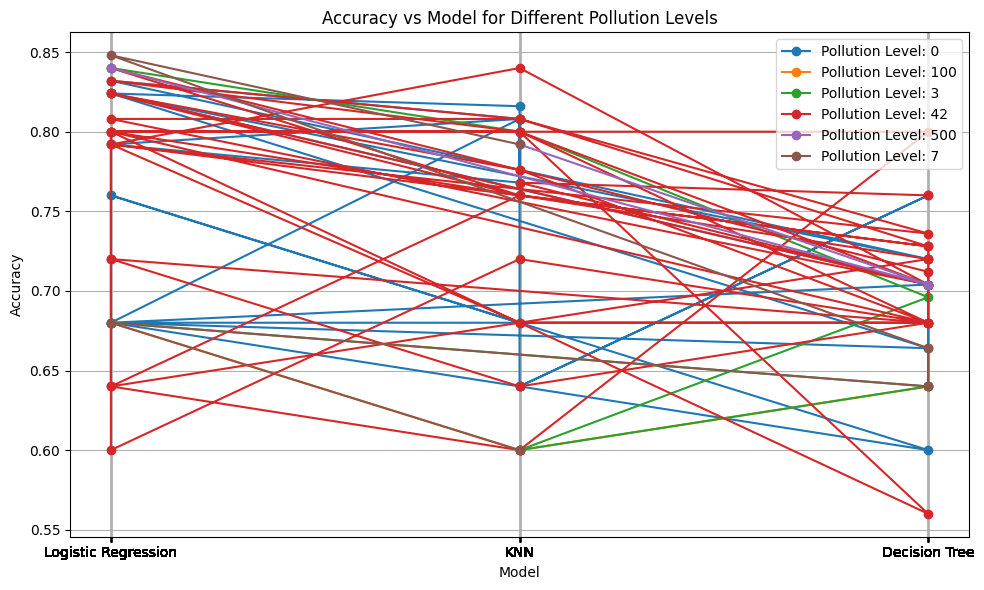

In [7]:
import matplotlib.pyplot as plt
df = kk.copy()

# Splitting the 'Training Data' column to extract pollution level
df['Pollution Level'] = df['Training Data'].apply(lambda x: x.split('_')[-1].split('.')[0])

# Sorting by Pollution Level for better visualization
df.sort_values(by='Pollution Level', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

pollution_levels = df['Pollution Level'].unique()
for level in pollution_levels:
    subset = df[df['Pollution Level'] == level]
    plt.plot(subset['Model'], subset['Accuracy'], marker='o', label=f'Pollution Level: {level}')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model for Different Pollution Levels')
plt.legend()
plt.grid(True)
plt.xticks(df['Model'])
plt.tight_layout()
plt.show()

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train two decision tree classifiers with different parameters
model1 = DecisionTreeClassifier(max_depth=3, random_state=42)
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Export the decision trees as text
tree1_text = export_text(model1, feature_names=iris.feature_names)
tree2_text = export_text(model2, feature_names=iris.feature_names)

# Compare the text representations of the trees
if tree1_text == tree2_text:
    print("The decision trees are identical.")
else:
    print("The decision trees are different.")


The decision trees are identical.


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train two logistic regression models with different parameters
model1 = LogisticRegression(random_state=42)
model2 = LogisticRegression(random_state=42)

# Fit the models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Compare the coefficients of the two models
coefficients_model1 = model1.coef_
coefficients_model2 = model2.coef_

# Check if the coefficients are identical
if np.array_equal(coefficients_model1, coefficients_model2):
    print("The logistic regression models have identical coefficients.")
else:
    print("The logistic regression models have different coefficients.")


The logistic regression models have identical coefficients.


In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train two KNN classifiers with different parameters
model1 = KNeighborsClassifier(n_neighbors=3)  # You can change n_neighbors as needed
model2 = KNeighborsClassifier(n_neighbors=3)  # Use the same number of neighbors for comparison

# Fit the models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Evaluate performance on the test set
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Compare performance metrics
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

print("Accuracy of Model 1:", accuracy1)
print("Accuracy of Model 2:", accuracy2)

# Check if models produce identical predictions
if (y_pred1 == y_pred2).all():
    print("The models produce identical predictions.")
else:
    print("The models produce different predictions.")

# Compare parameters
if model1.get_params() == model2.get_params():
    print("The models have identical parameters.")
else:
    print("The models have different parameters.")


Accuracy of Model 1: 1.0
Accuracy of Model 2: 1.0
The models produce identical predictions.
The models have identical parameters.


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train two Random Forest classifiers with different parameters
model1 = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
model2 = RandomForestClassifier(n_estimators=100, random_state=42)  # Use the same parameters for comparison

# Fit the models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Evaluate performance on the test set
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Compare performance metrics
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

print("Accuracy of Model 1:", accuracy1)
print("Accuracy of Model 2:", accuracy2)

# Check if models produce identical predictions
if np.array_equal(y_pred1, y_pred2):
    print("The models produce identical predictions.")
else:
    print("The models produce different predictions.")

# Compare parameters
params_model1 = model1.get_params()
params_model2 = model2.get_params()

if params_model1 == params_model2:
    print("The models have identical parameters.")
else:
    print("The models have different parameters.")

# Compare individual decision trees (optional)
trees_model1 = model1.estimators_
trees_model2 = model2.estimators_

if len(trees_model1) == len(trees_model2):
    for i in range(len(trees_model1)):
        if np.array_equal(trees_model1[i].tree_.feature, trees_model2[i].tree_.feature) \
            and np.array_equal(trees_model1[i].tree_.threshold, trees_model2[i].tree_.threshold):
            print(f"Decision Tree {i+1} of both models is identical.")
        else:
            print(f"Decision Tree {i+1} of both models is different.")
else:
    print("The number of decision trees in the models is different.")


Accuracy of Model 1: 1.0
Accuracy of Model 2: 1.0
The models produce identical predictions.
The models have identical parameters.
Decision Tree 1 of both models is identical.
Decision Tree 2 of both models is identical.
Decision Tree 3 of both models is identical.
Decision Tree 4 of both models is identical.
Decision Tree 5 of both models is identical.
Decision Tree 6 of both models is identical.
Decision Tree 7 of both models is identical.
Decision Tree 8 of both models is identical.
Decision Tree 9 of both models is identical.
Decision Tree 10 of both models is identical.
Decision Tree 11 of both models is identical.
Decision Tree 12 of both models is identical.
Decision Tree 13 of both models is identical.
Decision Tree 14 of both models is identical.
Decision Tree 15 of both models is identical.
Decision Tree 16 of both models is identical.
Decision Tree 17 of both models is identical.
Decision Tree 18 of both models is identical.
Decision Tree 19 of both models is identical.
Decis

In [7]:
kk.training_data

AttributeError: 'DataFrame' object has no attribute 'training_data'